<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Copia_de_Ecuacion_de_onda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ecuacion de la onda.

La ecuación de onda describe cómo se propagan vibraciones u oscilaciones en un medio, como una cuerda, una membrana o incluso ondas sonoras y electromagnéticas. Muestra cómo un punto del medio acelera según la curvatura que tiene la cuerda en ese instante. En otras palabras, modela cómo una perturbación inicial (como mover una cuerda o generar un pulso) viaja a lo largo del espacio con velocidad.

$\frac{∂ ^2 u}{\partial t^2} -4 \frac{\partial ^2 u}{\partial x^2}$ $= 0$

Con las condiciones de frontera

*   $u(0,t) = u(1,t) = 0$  $0 \leq t $

Condiciones iniciales
*   $u(x,0) = sen (\pi x),$ $0 \leq x \leq 1$

*   $\frac{\partial u}{\partial t}(x, 0) = 0,$  $0 \leq x \leq 1$





Usando $h = 0.1$ y $k = 0.05$

Compare los resultados con la solucion exacta

$u(x, t) = sen (\pi x) cos (2 \pi t)$

En diferencias finitas,

$u_{i,j+1} = 2(1 + λ)u_{i,j} + λ u_{i+1,j} + \lambda u_{i-1,j} - u_{i,j-1}$

$
\begin{pmatrix}
u_{1,j+1} \\
u_{2,j+1} \\
\vdots \\
u_{m-1,j+1}
\end{pmatrix}
=
\begin{pmatrix}
2 - 2\lambda & \lambda      &              &        \\
\lambda      & 2 - 2\lambda & \lambda      &        \\
             & \ddots       & \ddots       & \ddots \\
             &              & \lambda      & 2 - 2\lambda
\end{pmatrix}
\begin{pmatrix}
u_{1,j} \\
u_{2,j} \\
\vdots \\
u_{m-1,j}
\end{pmatrix}
-
\begin{pmatrix}
u_{1,j-1} \\
u_{2,j-1} \\
\vdots \\
u_{m-1,j-1}
\end{pmatrix}
$


In [ ]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm #color mapa

from tabulate import tabulate

Definimos la condicion como $f(x)=sen(\pi x)$

In [ ]:
def f(x):
  return np.sin(np.pi*x)

La graficamos

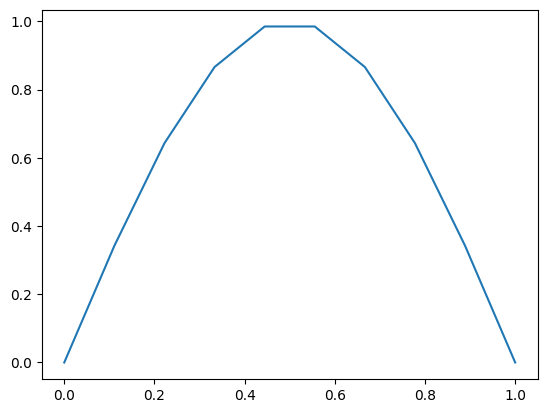

In [ ]:
x = np.linspace(0,1,10)
plt.plot(x,f(x))

Escribimos la matriz con sympy

In [ ]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i == j else b if abs(i - j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

$r = \lambda = \frac{\alpha ^2 k^2}{h^2}$

Sustituimos

$ \alpha ^2 = 4$,  $k = 0.05$,  $h = 0.1$


$r = \frac{(4)(0.05)^2}{(0.1)^2}$ $= 1$

In [ ]:
r = 1

In [ ]:
A = tridiagonal(9, 2 -2*r, r)

In [ ]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
u0 = sp.Matrix([f(0.1*(i+1)) for i in range (9)])

Debido a que la derivada es 0, se convierte en el mismo valor de nodo de abajo

In [ ]:
u1 = u0

Usando la definicion de onda

In [ ]:
def onda(A, u0, u1, j):
  #Asegurar que u0 y u1 sean vectores columna
  u0 = sp.Matrix(u0)
  u1 = sp.Matrix(u1)

  S = [u0, u1]

  for n in range(2, j):
    sol = A * S[n-1] - S[n-2]
    S.append(sol)

  return sp.Matrix([s.T for s in S])

In [ ]:
j = 50

In [ ]:
U = onda(A, u0, u1, j)

**Ejercicio 1**: Generar las gráficas 2D y 3D de la solución hasta t=0.5

In [ ]:
U_np = np.array(U.tolist(), dtype = float)

In [ ]:
x = np.linspace(0,0.5,9)
y = np.linspace(0,0.5,j)
X, Y = np.meshgrid(x, y)

###Grafica 2D de la ecuaion de onda

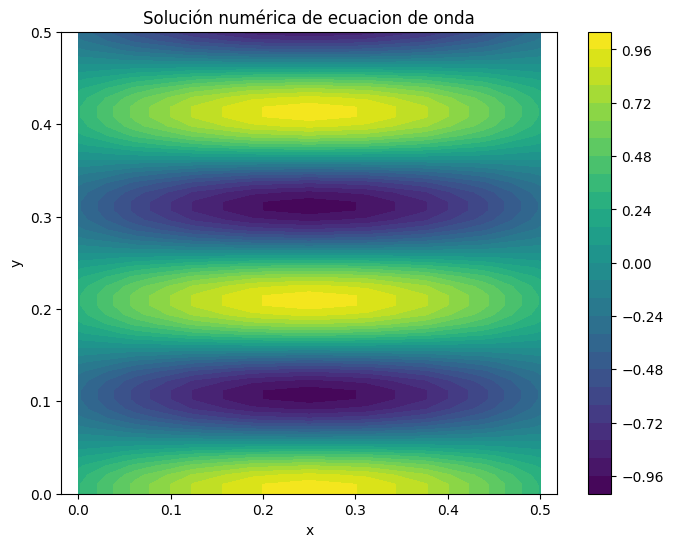

In [ ]:
#Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de ecuacion de onda')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

La gráfica 2D muestra cómo están los valores de la onda en toda la zona, los colores indican dónde la onda es más alta o más baja. Las partes claras son zonas donde la onda sube y las oscuras donde baja. Es básicamente una “vista desde arriba” de la forma de la onda en ese momento.

###Grafica 3D de la ecuacion de calor

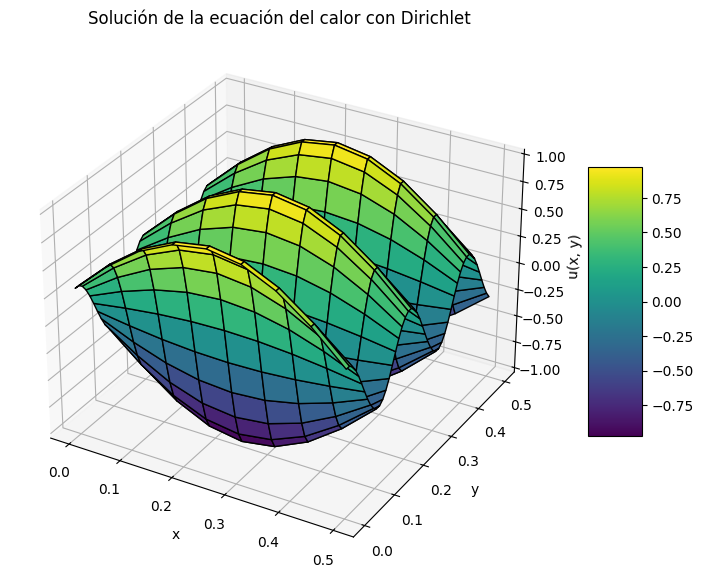

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

La gráfica 3D muestra la forma de la onda como si fuera una superficie. Las montañas representan zonas donde la onda sube y los valles donde baja. Es como ver la onda “desde arriba y de lado” al mismo tiempo, mostrando su altura en cada punto del plano.

**Ejercicio 2**: Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.


Parametros y la malla

$l = 20$, que el numero de pasos temporales

Nota: int-convierte un numero decimal (float) a entero

In [ ]:
h, k, r = 0.1, 0.05, 1
m = int(1/k)

Solucion numeria en t=1

In [ ]:
u_num = U_np[m]

Solucion exacta en t = 1

In [ ]:
x_points = np.array([0.1*(i+1) for i in range(9)])
u_exact = np.sin(np.pi * x_points) * np.cos(2*np.pi*1)

Error absoluto

In [ ]:
error = np.abs(u_exact - u_num)

Creanndo la tabla con tabule

In [ ]:
tabla = np.column_stack([x_points, u_exact, u_num, error])
print(tabulate(tabla,
               headers=["x", "u_exact", "u_num", "error"],
               floatfmt=".6f",
               tablefmt="fancy_grid"))

╒══════════╤═══════════╤══════════╤══════════╕
│        x │   u_exact │    u_num │    error │
╞══════════╪═══════════╪══════════╪══════════╡
│ 0.100000 │  0.309017 │ 0.309017 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.200000 │  0.587785 │ 0.587785 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.300000 │  0.809017 │ 0.809017 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.400000 │  0.951057 │ 0.951057 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.500000 │  1.000000 │ 1.000000 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.600000 │  0.951057 │ 0.951057 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.700000 │  0.809017 │ 0.809017 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.800000 │  0.587785 │ 0.587785 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.900000 │  0.309017 │ 0.309017 │ 0.000000 │
╘══════════╧═══════════╧══════════╧══════════╛


Nota: el error sale 0 por que es muy pequeño el error y lo redondea

**Ejercicio 3**: Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.

Grafica comparando solucion exacta con la numerica

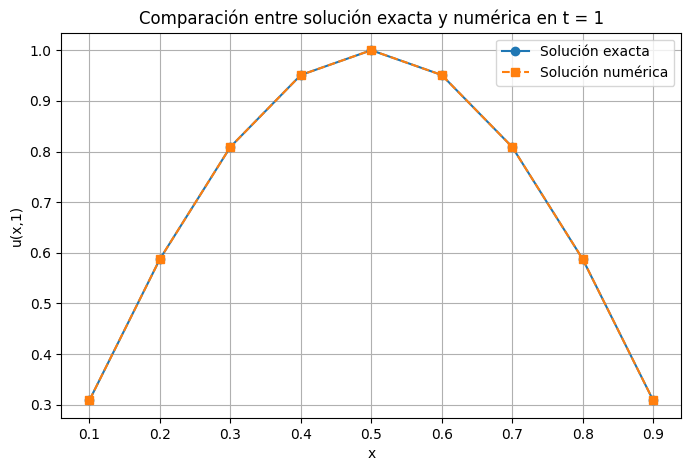

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(x_points, u_exact, 'o-', label='Solución exacta')
plt.plot(x_points, u_num, 's--', label='Solución numérica')
plt.xlabel('x')
plt.ylabel('u(x,1)')
plt.title('Comparación entre solución exacta y numérica en t = 1')
plt.grid(True)
plt.legend()
plt.show()

La gráfica muestra cómo la solución numérica y la solución exacta prácticamente coinciden a lo largo del intervalo. Las dos curvas se sobreponen casi completamente, lo que indica que el método numérico está funcionando correctamente.

Grafica del error

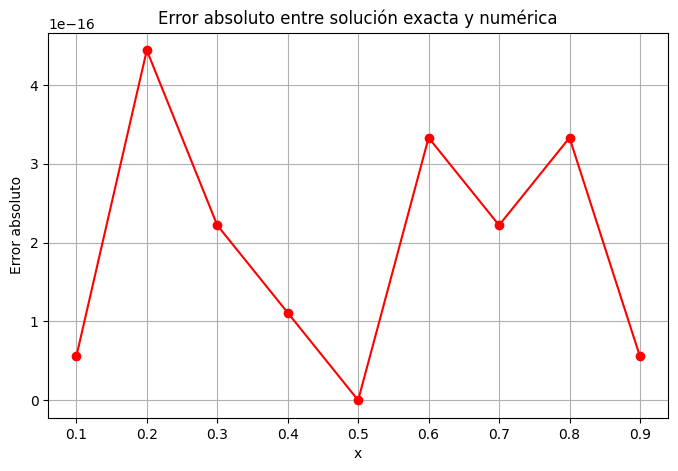

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(x_points, error, 'o-r')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Error absoluto entre solución exacta y numérica')
plt.grid(True)
plt.show()

Creando la tabla del error con tabule

In [ ]:
tabla2 = np.column_stack([x_points, u_exact, u_num, error])
print(tabulate(tabla2,
               headers=["x", "u_exact", "u_num", "error"],
               floatfmt=".6f",
               tablefmt="fancy_grid"))

╒══════════╤═══════════╤══════════╤══════════╕
│        x │   u_exact │    u_num │    error │
╞══════════╪═══════════╪══════════╪══════════╡
│ 0.100000 │  0.309017 │ 0.309017 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.200000 │  0.587785 │ 0.587785 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.300000 │  0.809017 │ 0.809017 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.400000 │  0.951057 │ 0.951057 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.500000 │  1.000000 │ 1.000000 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.600000 │  0.951057 │ 0.951057 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.700000 │  0.809017 │ 0.809017 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.800000 │  0.587785 │ 0.587785 │ 0.000000 │
├──────────┼───────────┼──────────┼──────────┤
│ 0.900000 │  0.309017 │ 0.309017 │ 0.000000 │
╘══════════╧═══════════╧══════════╧══════════╛


La solución numérica y la solución exacta prácticamente se ven iguales en la gráfica. La línea que obtuvimos con el método numérico sigue muy bien la forma de la solución verdadera.

El error entre ambas es muy pequeño, así que podemos decir que el método funciona bien y que los resultados son confiables.

**Ejercicio 4**: Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.
onda.png

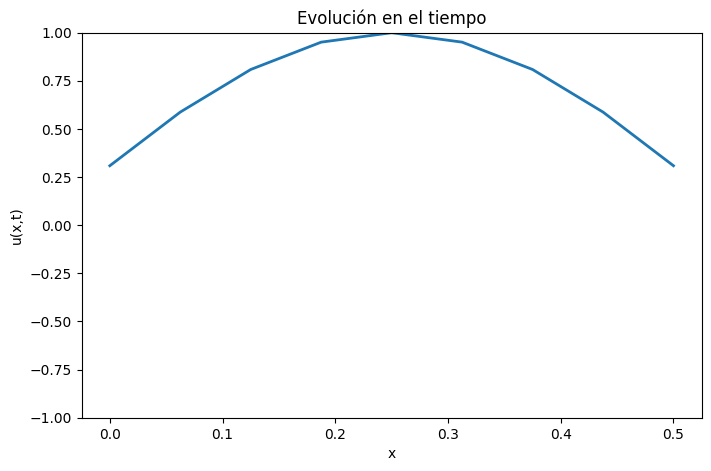

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots(figsize=(8,5))

line, = ax.plot(x, U_np[0], lw=2)

ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=U_np.shape[0], interval=200)
plt.show()

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


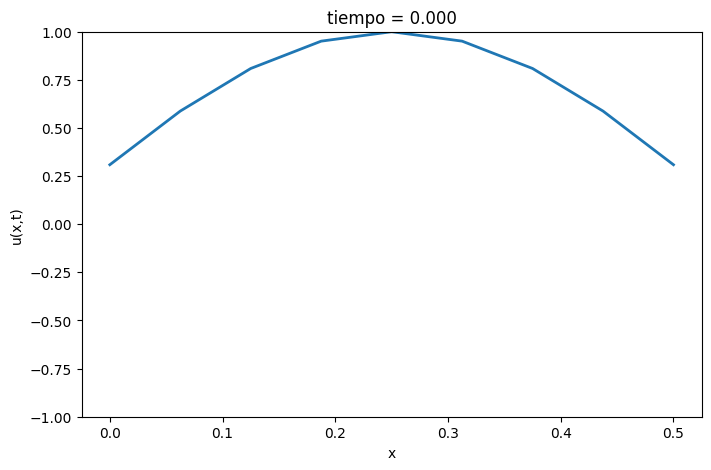

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots(figsize=(8,5))

line, = ax.plot(x, U_np[0], lw=2)

ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=U_np.shape[0], interval=200)

#Necesario en Colab para mostrar animaciones:
from IPython.display import HTML
HTML(anim.to_jshtml())


La animación muestra cómo va cambiando la onda con el tiempo. Se ve cómo la superficie sube, baja y se mueve, mostrando la evolución de la vibración paso a paso, como si fuera un video del comportamiento de la onda.

**Conclusion:** Los resultados numéricos coincidieron casi exactamente con la solución exacta. Las gráficas confirmaron que el método siguió correctamente la forma de la onda y el error fue muy pequeño. En general, el procedimiento funcionó bien y los resultados obtenidos fueron buenos.